# Problem

Following is sample of raw DAS data.
- Horizontal axis is the space (spatial)
- Vertial axis is the time (temporal)

![alt text](../docs/das-raw.png)

We want to design a suitable Gaussian kernel for Gaussian smoothing to hightlight a specific events with predetermined speed in DAS data. Example of Gaussian kernel:

![alt text](../docs/kernel.png)

____

# Idea

- Assume the Gaussian kernel has the ellipse shape.
- On one hand, the ellipse shape is fully determined by its bounded retangular.
- On the other hand, the bounded retangular can be determined by either its two edges AB and BC, or its two diagonal lines AC and BD.
- Let AC and BD represent the two speed limits that we desire to highlights in the DAS data.
- AC is the upper speed limit (the more horizontal, the faster). BD is the lower speed limit.

<img src="../docs/kernel-shape.png" alt="alt text" style="background-color: white;" width="500">

However, the speed limits only determine the directions of AC and BD. They do not constrain the length of AC and BD. As a result, the size of the retangular is not fixed yet (only similar, not congruent). Below is the demonstration of two similar retangulars ABCD and A'B'C'D'.

<img src="../docs/kernel-shape-elastic.png" alt="alt text" style="background-color: white;" width="500">

Therefore, apart from the speed limits (the direction of AC and BD), it's neccessary to additionally determine the height or the width of the rectangle in order to fix the size of the rectangle.

<img src="../docs/kernel-shape-size.png" alt="alt text" style="background-color: white;" width="500">

______

# Theory

### 1. Covariance Matrix of a 2D Gaussian Distribution

A 2D Gaussian distribution can be characterized by its mean vector and covariance matrix. The covariance matrix $\Sigma$ of a 2D Gaussian distribution is a $2 \times 2$ symmetric matrix that describes the variance and the correlation between the two variables $X_1$ and $X_2$:

$
\Sigma = \begin{pmatrix}
\sigma_{X_1}^2 & \sigma_{X_1 X_2} \\
\sigma_{X_1 X_2} & \sigma_{X_2}^2
\end{pmatrix}
$

where $\sigma_{X_1}^2$ and $\sigma_{X_2}^2$ are the variances of $X_1$ and $X_2$ respectively, and $\sigma_{X_1 X_2}$ is the covariance between $X_1$ and $X_2$.

### 2. Eigenvalues and Eigenvectors

For the covariance matrix $\Sigma$:

1. **Eigenvalues**: The eigenvalues $\lambda_1$ and $\lambda_2$ are the scalars that satisfy the characteristic equation $\det(\Sigma - \lambda I) = 0$, where $I$ is the identity matrix. The eigenvalues represent the variances along the principal components (directions) of the distribution.

2. **Eigenvectors**: The eigenvectors $\mathbf{v}_1$ and $\mathbf{v}_2$ corresponding to the eigenvalues $\lambda_1$ and $\lambda_2$ are the directions in which these variances occur. These vectors are orthogonal to each other if $\Sigma$ is symmetric.

<img src="../docs/eigenvalues-eigenvectors.png" alt="alt text" style="background-color: white;" width="500">

- The 2D Gaussian distribution shape is determined by its covariance matrix
$\Sigma = \begin{pmatrix}
\sigma_{X_1}^2 & \sigma_{X_1 X_2} \\
\sigma_{X_1 X_2} & \sigma_{X_2}^2
\end{pmatrix}$.
- On one hand, eigenvalues and eigenvectors can be  uniquely determined by a given $\Sigma$.
- On the other hand, the $\Sigma$ can be also uniquely determined by given eigenvalues and eigenvectors.
- So we have:
$
\Sigma = \begin{pmatrix}
\sigma_{X_1}^2 & \sigma_{X_1 X_2} \\
\sigma_{X_1 X_2} & \sigma_{X_2}^2
\end{pmatrix}
\iff \set{(\lambda_1, \lambda_2), (\mathbf{v}_1, \mathbf{v}_2)}
$
- Therefore, in order to determine $\Sigma$, it is adequate to determine $\set{(\lambda_1, \lambda_2), (\mathbf{v}_1, \mathbf{v}_2)}$
    - $\mathbf{v}_1$ and $\mathbf{v}_2$ can be determined by the average of the speed limits:
        - $\mathbf{v}_1$ has the same direction with the average of the speed limits
        - $\mathbf{v}_2$ is perpendicular with $\mathbf{v}_1$
    - $\lambda_1$ and $\lambda_2$ can be determined by the "variance" along the space or the time dimension, which has to be predetermined.



# Solution

<img src="../docs/speed-distance-time.png" alt="alt text" style="background-color: white;" width="500">

<img src="../docs/variance-space-time.png" alt="alt text" style="background-color: white;" width="500">

Inputs:
- $S_1$: Lower speed limit (km/h or m/s)
- $S_2$: Upper speed limit (km/h or m/s)
- $V_s$: Variance along space dimension (either $V_s$ or $V_t$ is inputed, not both)
- $V_t$: Variance along time dimension (either $V_s$ or $V_t$ is inputed, not both)

Logics:
- If $S_1$ and $S_2$ are originally in km/h, convert them to m/s:
    - $S_1 = \frac{S_1\times1000}{3600} = \frac{S_1}{3.6}$
    - $S_2 = \frac{S_2\times1000}{3600} = \frac{S_2}{3.6}$
- Calculate the slopes of $S_1$ and $S_2$:
    - $\theta_1 = \arctan(\frac{T_1}{D}) = \arctan(\frac{1}{S_1})$
    - $\theta_2 = \arctan(\frac{T_2}{D}) = \arctan(\frac{1}{S_2})$
    - Where $T_1$, $T_2$ and $D$ are time of $S_1$, time of $S_2$ and distance, respectively (apply formula: speed = distance/time)
- Calculate the average slope:
    - $\theta=0.5(\theta_1+\theta_2)$ (proof below)

Output:
- Eigenvector $\mathbf{v}_1$ = $[1, \tan(\theta)]$: the average direction between $S_1$ and $S_2$ (normalize to basis vectors)
- Eigenvector $\mathbf{v}_2$ = $[\tan(\theta), -1]$: perpendicular with $\mathbf{v}_1$
- Eigenvalue $\lambda_1$:
    - If ${V_s}$: $\cos(\theta) = \frac{V_s}{\lambda_1} \Longleftrightarrow \lambda_1 = \frac{V_s}{\cos(\theta)}$
    - If ${V_t}$: $\sin(\theta) = \frac{V_t}{\lambda_1} \Longleftrightarrow \lambda_1 = \frac{V_t}{\sin(\theta)}$
- Eigenvalue $\lambda_2$:
    - $\tan(\theta_1-\theta) = \frac{\lambda_2}{\lambda_1} \Longleftrightarrow \lambda_2=\tan(\theta_1-\theta) \times \lambda_1$ 

----
Proof $\theta=0.5(\theta_1+\theta_2)$

<img src="../docs/geometry.png" alt="alt text" style="background-color: white;" width="500">

Assume $a_1 \le a_2, b_1 \le b_2$. Let the length of $S_1$ and $S_2$ be $h$.

$\sin\theta_1=\frac{a}{h}, \cos\theta_1=\frac{b_2-b_1}{h}=\frac{b-2b_1}{h}$

$\cos\theta_2=\frac{b}{h}, \sin\theta_2=\frac{a_2-a_1}{h}=\frac{a-2a_1}{h}$

$\tan\theta = \frac{a_2}{b_2}
= \frac{h\sin(\theta_2)+a_1}{h\cos(\theta_1)+b_1}
= \frac{h\sin\theta_2+\frac{a-h\sin\theta_2}{2}}{h\cos\theta_1+\frac{b-h\cos\theta_1}{2}}
= \frac{2h\sin(\theta_2)+a-h\sin\theta_2}{2h\cos(\theta_1)+b-h\cos\theta_1}
= \frac{h\sin(\theta_2)+a}{2h\cos(\theta_1)+b}
= \frac{h\sin\theta_2+h\sin\theta_1}{h\cos\theta_1+h\cos\theta_2}
= \frac{\sin\theta_2+\sin\theta_1}{\cos\theta_1+\cos\theta_2}
= \frac{2\sin{\frac{\theta_1+\theta_2}{2}}\cos{\frac{\theta_1-\theta_2}{2}}}{2\cos{\frac{\theta_1+\theta_2}{2}}\cos{\frac{\theta_1-\theta_2}{2}}}
= \tan{\frac{\theta_1+\theta_2}{2}}$

----
# Implementation

In [41]:
import numpy as np
from typing import Literal, Tuple, Union
from matplotlib import colors
import matplotlib.pyplot as plt

In [82]:
def cal_eigen(
    s1: float,
    s2: float,
    std_s: float = None,
    std_t: float = None,
    unit: Literal['km/h', 'm/s'] = 'km/h'  # 'km/h' or 'm/s'
) -> Tuple[float, float, float, float]:
    """Calculate the eigenvalues and eigenvectors of the covariance matrix of
    2d Gaussian distribution of two velocity vectors.

    Args:
        s1 (float): Speed of the first velocity vector.
        s2 (float): Speed of the second velocity vector.
        std_s (float, optional): Standard deviation along the space dimension.
            In meters. Defaults to None.
        std_t (float, optional): Standard deviation along the time dimension.
            In seconds. Defaults to None.
        unit (Literal['km/h', 'm/s'], optional): Unit of the speed. Defaults to
            'km/h'.

    Returns:
        Tuple[float, float, float, float]: Eigenvalues and eigenvectors of the
            covariance matrix.
    """
    if ((std_t is None and std_s is None)
        or (std_t is not None and std_s is not None)):
        raise ValueError(
            "Either 'std_t' or 'std_s' must be provided, but not both.")
    # convert to m/s
    if unit == 'km/h':
        s1 = s1 / 3.6
        s2 = s2 / 3.6
    # calculate angle
    theta1 = np.arctan(1 / s1)
    theta2 = np.arctan(1 / s2)
    theta = 0.5 * (theta1 + theta2)
    # calculate eigenvalues and eigenvectors
    if std_s is not None:
        var_s = std_s ** 2
        eigval_1 = var_s / np.cos(theta)
    if std_t is not None:
        var_t = std_t ** 2 
        eigval_1 = var_t / np.sin(theta)
    eigval_2 = np.tan(theta1 - theta) * eigval_1
    eigvec_1 = [1, np.tan(theta)]
    eigvec_1_norm = np.array(eigvec_1) / np.linalg.norm(eigvec_1)  # normalize
    eigvec_2_norm = np.array([-eigvec_1_norm[1], eigvec_1_norm[0]])  # normalize
    return eigval_1, eigval_2, eigvec_1_norm, eigvec_2_norm

In [83]:
# test the function
s_rate=0.25
t_rate=100
s1=90
s2=91
std_s=20
std_t=5
unit='km/h'


eigval_1, eigval_2, eigvec_1, eigvec_2  = cal_eigen(
    s1=s1,
    s2=s2,
    # std_s=std_s,  # 2 -> 8, 10 -> 40, 20 -> 80, 100 -> 400
    std_t=std_t, # 2 -> 1.6, 10 -> 8, 20 -> 16, 100 -> 80
    unit=unit
)
eigval_1, eigval_2, eigvec_1, eigvec_2

(628.9501251398765,
 0.13801239683476643,
 array([0.9992097 , 0.03974878]),
 array([-0.03974878,  0.9992097 ]))

In [84]:
def cal_cov_mat(
    eigval_1: float,
    eigval_2: float,
    eigvec_1: float,
    eigvec_2: float
) -> np.ndarray:
    """Calculate the covariance matrix from the eigenvalues and eigenvectors.

    Args:
        eigvec_1 (float): The first eigenvector.
        eigvec_2 (float): The second eigenvector.
        eigval_1 (float): The first eigenvalue.
        eigval_2 (float): The second eigenvalue.

    Returns:
        np.ndarray: The covariance matrix.
    """
    # Convert the eigenvectors to a 2x2 array (each column is an eigenvector)
    eigvecs = np.array([eigvec_1, eigvec_2]).T
    
    # Create the diagonal matrix of eigenvalues
    eigvals = np.diag([eigval_1, eigval_2])
    
    # Calculate the covariance matrix
    cov_mat = eigvecs @ eigvals @ eigvecs.T
    
    return cov_mat

In [85]:
# test the function
cov_mat = cal_cov_mat(eigval_1, eigval_2, eigvec_1, eigvec_2)
cov_mat

array([[627.9566237 ,  24.97476114],
       [ 24.97476114,   1.13151384]])

In [6]:
import numpy as np

def reconstruct_covariance_from_eigen(eigenvalues, eigenvectors):
    """
    Reconstruct the covariance matrix given eigenvalues and eigenvectors (up to a scalar multiple).

    Parameters:
    eigenvalues (list or np.array): Eigenvalues [lambda1, lambda2]
    eigenvectors (list of lists or np.array): Eigenvector directions [[v1_x, v1_y], [v2_x, v2_y]]

    Returns:
    np.array: The reconstructed covariance matrix
    """
    # Ensure eigenvalues and eigenvectors are numpy arrays
    eigenvalues = np.array(eigenvalues)
    eigenvectors = np.array(eigenvectors)

    # Normalize the eigenvectors
    v1 = eigenvectors[0] / np.linalg.norm(eigenvectors[0])
    v2 = eigenvectors[1] / np.linalg.norm(eigenvectors[1])

    # Create the matrix of eigenvectors
    V = np.column_stack((v1, v2))

    # Create the diagonal matrix of eigenvalues
    Lambda = np.diag(eigenvalues)

    # Reconstruct the covariance matrix
    Sigma = V @ Lambda @ V.T

    return Sigma

# Example usage:
eigenvalues = [eigval_1, eigval_2]
eigenvectors = [eigvec_1, eigvec_2]

cov_mat = reconstruct_covariance_from_eigen(eigenvalues, eigenvectors)
print("Reconstructed Covariance Matrix:\n", cov_mat)


Reconstructed Covariance Matrix:
 [[627.9566237   24.97476114]
 [ 24.97476114   1.13151384]]


In [7]:
eigenvalues

[628.9501251398765, 0.13801239683476643]

In [8]:
np.sqrt(cov_mat[0, 0])

25.059062705952673

In [9]:
def calculate_eigenvectors_and_eigenvalues(cov_matrix):
    """
    Calculate the eigenvectors and eigenvalues of a covariance matrix.
    
    Parameters:
    cov_matrix (numpy.ndarray): A 2x2 covariance matrix.
    
    Returns:
    tuple: A tuple containing an array of eigenvalues and an array of eigenvectors.
    """
    # Ensure the input is a numpy array
    cov_matrix = np.array(cov_matrix)
    
    # Check if the input is a 2x2 matrix
    if cov_matrix.shape != (2, 2):
        raise ValueError("The covariance matrix must be a 2x2 matrix.")
    
    # Calculate eigenvalues and eigenvectors using numpy
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    return eigenvalues, eigenvectors


calculate_eigenvectors_and_eigenvalues(cov_mat)


(array([6.28950125e+02, 1.38012397e-01]),
 array([[ 0.9992097 , -0.03974878],
        [ 0.03974878,  0.9992097 ]]))

In [10]:
eigval_1, eigval_2, eigvec_1, eigvec_2, 

(628.9501251398765,
 0.13801239683476643,
 [1, 0.03978021786173813],
 [0.03978021786173813, -1])

In [11]:
# def create_gauss_kernel(
#     cov_mat: np.ndarray,
#     s_rate: float,
#     t_rate: float
# ) -> np.ndarray:
#     """Create Gaussian kernel from covariance matrix

#     Args:
#         cov_mat (np.ndarray): Covariance matrix.
#         s_rate (float): Spatial sampling rate.
#         t_rate (float): Temporal sampling rate.

#     Returns:
#         np.ndarray: Gaussian kernel.
#     """
#     # Calculate the size of the kernel
#     size_s = np.sqrt(cov_mat[0][0]) * 2 * 2 * s_rate  # 2 sides * 2 std
#     size_t = np.sqrt(cov_mat[1][1]) * 2 * 2 * t_rate  # 2 sides * 2 std
#     size_s = int(round(size_s, 0))
#     size_t = int(round(size_t, 0))
#     # Create grid of points
#     range_s = np.arange(-size_s // 2, size_s // 2 + 1) / s_rate
#     range_t = np.arange(-size_t // 2, size_t // 2 + 1) / t_rate
#     x, y = np.meshgrid(range_s, range_t)
#     # Calculate the Gaussian values
#     det_cov_mat = np.linalg.det(cov_mat)  # determinant of covariance matrix
#     inv_cov_mat = np.linalg.inv(cov_mat)  # inverse covariance matrix
#     exponent = -0.5 * (
#         inv_cov_mat[0, 0] * x**2 +
#         2 * inv_cov_mat[0, 1] * x * y +
#         inv_cov_mat[1, 1] * y**2
#     )
#     gauss_kernel = np.exp(exponent) / (2 * np.pi * np.sqrt(det_cov_mat))
#     # Normalize the filter
#     gauss_kernel /= np.sum(gauss_kernel)
#     return gauss_kernel

In [12]:
def create_gauss_kernel(
    cov_mat: np.ndarray,
    s_rate: float,
    t_rate: float
) -> np.ndarray:
    """Create Gaussian kernel from covariance matrix

    Args:
        cov_mat (np.ndarray): Covariance matrix.
        s_rate (float): Spatial sampling rate.
        t_rate (float): Temporal sampling rate.

    Returns:
        np.ndarray: Gaussian kernel.
    """
    # Adjust the covariance matrix according to the sampling rates
    cov_mat_adj = np.array([
        [s_rate**2 * cov_mat[0, 0], s_rate * t_rate * cov_mat[0, 1]],
        [s_rate * t_rate * cov_mat[1, 0], t_rate**2 * cov_mat[1, 1]]
    ])
    # Calculate the size of the kernel
    size_s = np.sqrt(cov_mat_adj[0][0]) * 2 * 2  # 2 sides * 2 std
    size_t = np.sqrt(cov_mat_adj[1][1]) * 2 * 2  # 2 sides * 2 std
    size_s = int(round(size_s, 0))
    size_t = int(round(size_t, 0))
    # Create grid of points
    range_s = np.arange(-size_s // 2, size_s // 2 + 1)
    range_t = np.arange(-size_t // 2, size_t // 2 + 1)
    x, y = np.meshgrid(range_s, range_t)
    # Calculate the Gaussian values
    det_cov_mat = np.linalg.det(cov_mat_adj)  # determinant of covariance matrix
    inv_cov_mat = np.linalg.inv(cov_mat_adj)  # inverse covariance matrix
    exponent = -0.5 * (
        inv_cov_mat[0, 0] * x**2 +
        2 * inv_cov_mat[0, 1] * x * y +
        inv_cov_mat[1, 1] * y**2
    )
    gauss_kernel = np.exp(exponent) / (2 * np.pi * np.sqrt(det_cov_mat))
    # Normalize the filter
    gauss_kernel /= np.sum(gauss_kernel)
    return gauss_kernel
    # return size_s, size_t

In [13]:
# Adjust the covariance matrix according to the sampling rates
cov_mat_adj = np.array([
    [s_rate**2 * cov_mat[0, 0], s_rate * t_rate * cov_mat[0, 1]],
    [s_rate * t_rate * cov_mat[1, 0], t_rate**2 * cov_mat[1, 1]]
])
# Calculate the size of the kernel
size_s = np.sqrt(cov_mat_adj[0][0]) * 2 * 2  # 2 sides * 2 std
size_t = np.sqrt(cov_mat_adj[1][1]) * 2 * 2  # 2 sides * 2 std
size_s = int(round(size_s, 0))
size_t = int(round(size_t, 0))

In [14]:
size_s

25

In [15]:
size_t

425

In [16]:
# test the function
gauss_kernel = create_gauss_kernel(
    cov_mat,
    s_rate=s_rate,
    t_rate=t_rate
)
print(gauss_kernel.shape)

(426, 26)


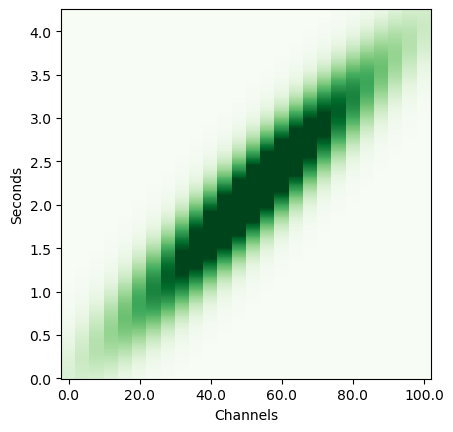

In [17]:
def heatmap_filter(
    kernel: np.ndarray,
    s_rate: float,
    t_rate: float,
) -> None:
    """Visualize kernel in heatmap.

    Args:
        kernel (np.ndarray): Kernel array.
        s_rate (float): Spatial sampling rate.
        t_rate (float): Temporal sampling rate.
    """
    percentile = np.quantile(np.abs(kernel), 0.95)
    vmin = 0
    vmax = percentile
    norm = colors.TwoSlopeNorm(
        vmin=vmin,
        vmax=vmax,
        vcenter=(vmin + vmax) / 2
    )
    cmap = 'Greens'
    plt.imshow(
        X=kernel,
        aspect=kernel.shape[1] / kernel.shape[0],  # square
        cmap=cmap,
        norm=norm,
        interpolation='none',  # no interpolation
        origin='lower'
    )
    plt.xlabel('Channels')
    plt.ylabel('Seconds')

    # Get the current tick locations
    current_xticks = plt.gca().get_xticks()[1:-1]
    current_yticks = plt.gca().get_yticks()[1:-1]

    # Create new tick locations by dividing by sampling rate
    new_xticks = current_xticks / s_rate
    new_yticks = current_yticks / t_rate

    # Set the new tick locations
    plt.gca().set_xticks(current_xticks)
    plt.gca().set_xticklabels(new_xticks)

    plt.gca().set_yticks(current_yticks)
    plt.gca().set_yticklabels(new_yticks)


# test the function
heatmap_filter(gauss_kernel, s_rate=s_rate, t_rate=t_rate)

In [18]:
def recon_cov_mat(
    sigma11: float = None,
    sigma22: float = None,
    v1: Union[np.array, list] = None,
    k: float = None
) -> np.array:
    """Reconstruct the covariance matrix (of a 2D Gaussian distribution) given
        one variance, the first eigenvector direction, and the proportion of
        eigenvalues.

    Args:
        sigma11 (float, optional): Variance along the first axis (x-axis).
            Defaults to None.
        sigma22 (float, optional): Variance along the second axis (y-axis).
            Defaults to None.
        v1 (Union[np.array, list], optional): First eigenvector direction.
            Defaults to None.
        k (float, optional): Proportion of the two eigenvalues (lambda1 /
            lambda2). Defaults to None.

    Returns:
        np.array: The reconstructed covariance matrix.
    """
    # sigma11, sigma22 are variances
    # Sigma = [[sigma11, sigma12], [sigma21, sigma22]] is the covariance matrix
    # lambda1, lambda2 are eigenvalues
    # v1, v2 are eigenvectors
    if sigma11 is not None and sigma22 is not None:
        raise ValueError("At least one of sigma11 or sigma22 must be provided.")
    
    if v1 is None:
        raise ValueError("First eigenvector direction must be provided.")
    
    if k is None:
        raise ValueError("Proportion of the eigenvalues (k) must be provided.")

    v1 = np.array(v1)  # convert to numpy array
    v1 = v1 / np.linalg.norm(v1)  # normalize the eigenvector
    v2 = np.array([-v1[1], v1[0]])  # orthogonal to the first
    V = np.column_stack((v1, v2))  # create the matrix of eigenvectors
    
    # Calculate lambda2 using sigma11 or sigma22
    # if sigma11 is not None:
    #     lambda2 = sigma11 / (k * v1[0]**2 + v2[0]**2)
    # elif sigma22 is not None:
    #     lambda2 = sigma22 / (k * v1[1]**2 + v2[1]**2)

    if sigma11 is not None:
        lambda2 = sigma11 / (v1[0]**2 + k * v1[1]**2)
    elif sigma22 is not None:
        lambda2 = sigma22 / (v1[1]**2 + k * v1[0]**2)

    

    lambda1 = k * lambda2  # calculate lambda1
    Lambda = np.diag([lambda1, lambda2])  # diagonal matrix of eigenvalues

    Sigma = V @ Lambda @ V.T  # reconstruct the covariance matrix

    return Sigma

# Example usage:
sigma11 = 4.0
v1 = [1, 2]
k = 1.5

cov_matrix = recon_cov_mat(sigma11=sigma11, v1=v1, k=k)
print("Reconstructed Covariance Matrix:\n", cov_matrix)


Reconstructed Covariance Matrix:
 [[3.14285714 0.57142857]
 [0.57142857 4.        ]]


In [19]:
def cal_speed_angle(
    s1: float,
    s2: float,
    unit: Literal['km/h', 'm/s'] = 'km/h'  # 'km/h' or 'm/s'
) -> Tuple[float, float, float]:
    """Calculate the angle of the two velocity vectors (with the horizontal)
    and their average.

    Args:
        s1 (float): Lower speed limit.
        s2 (float): Upper speed limit.
        unit (Literal['km/h', 'm/s'], optional): Unit of the speed. Defaults to
            'km/h'.

    Returns:
        Tuple[float, float, float]: Angles of the two velocity vectors and
            their average.
    """
    # convert to m/s
    if unit == 'km/h':
        s1 = s1 / 3.6
        s2 = s2 / 3.6
    # calculate angle
    theta1 = np.arctan(1 / s1)
    theta2 = np.arctan(1 / s2)
    theta = 0.5 * (theta1 + theta2)
    return theta1, theta2, theta


# test the function
s1 = 90
s2 = 91
unit = 'km/h'
theta1, theta2, theta = cal_speed_angle(s1, s2, unit)
theta1, theta2, theta

(0.039978687123290044, 0.03953982118113306, 0.03975925415221156)

In [20]:
np.tan(np.abs(theta1 - theta))

0.0002194329746004469

In [21]:


# Set the precision (in decimal places)
mpmath.mp.dps = 50  # Increase to desired precision

# Calculate arctan with higher precision
high_precision_arctan = mpmath.atan(1)

print(high_precision_arctan)


NameError: name 'mpmath' is not defined

In [ ]:
s1=90
s2=91
std_s=20
std_t=5
unit='km/h'

theta1, theta2, theta = cal_speed_angle(s1=s1, s2=s2, unit=unit)
cov_mat = recon_cov_mat(
    sigma11=std_s**2,
    # sigma22=std_t**2,
    v1=[1, np.tan(theta)],
    k=np.tan(np.abs(theta1 - theta))
)
cov_mat

array([[  0.72075923, -15.90858998],
       [-15.90858998, 400.        ]])

(8001, 2)


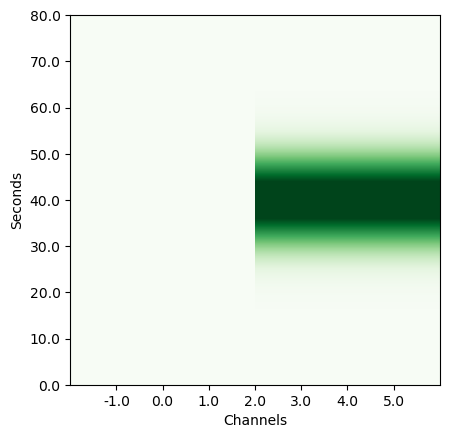

In [ ]:
# test the function
gauss_kernel = create_gauss_kernel(
    cov_mat,
    s_rate=s_rate,
    t_rate=t_rate
)
print(gauss_kernel.shape)
heatmap_filter(gauss_kernel, s_rate=s_rate, t_rate=t_rate)

In [86]:
import numpy as np

def covariance_matrix(eigenvalues, eigenvectors):
    """
    Calculate the covariance matrix given the eigenvalues and eigenvectors.
    
    Parameters:
    eigenvalues (list or np.ndarray): A list or array of eigenvalues.
    eigenvectors (np.ndarray): A 2D array where each column is an eigenvector.
    
    Returns:
    np.ndarray: The covariance matrix.
    """
    # Ensure eigenvalues are in a diagonal matrix form
    lambda_matrix = np.diag(eigenvalues)
    
    # Calculate the covariance matrix
    cov_mat = eigenvectors @ lambda_matrix @ eigenvectors.T
    
    return cov_mat


In [89]:
# Example usage:
eigenvalues = [4, 2]
eigenvectors = np.array([[0.6, 0.8],
                         [0.8, -0.6]])

cov_mat = covariance_matrix(eigenvalues, eigenvectors)
print("Covariance Matrix:\n", cov_mat)

Covariance Matrix:
 [[37.28 47.04]
 [47.04 64.72]]


In [160]:
import numpy as np

# Example matrix
A = np.array([[1, 2], [2, 4]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Print eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[0. 5.]

Eigenvectors:
[[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]


In [161]:
# # Example usage:
# eigenvalues = [4, 2]
# eigenvectors = 3*np.array([[0.6, 0.8],
#                          [0.8, -0.6]])

cov_mat = covariance_matrix(eigenvalues, eigenvectors.T)
print("Covariance Matrix:\n", cov_mat)

Covariance Matrix:
 [[ 1. -2.]
 [-2.  4.]]


In [162]:
eigenvectors

array([[-0.89442719, -0.4472136 ],
       [ 0.4472136 , -0.89442719]])

In [149]:
eigenvectors.T

array([[-0.82456484,  0.56576746],
       [-0.41597356, -0.90937671]])

In [7]:
eigenvectors

array([[ 1.8,  2.4],
       [ 2.4, -1.8]])

In [150]:
import numpy as np

def normalize_eigenvectors(eigenvectors):
    """
    Normalize the eigenvectors to ensure they are unit vectors.
    
    Parameters:
    eigenvectors (np.ndarray): A 2D array where each column is an eigenvector.
    
    Returns:
    np.ndarray: A 2D array of normalized eigenvectors.
    """
    normalized_eigenvectors = eigenvectors / np.linalg.norm(eigenvectors, axis=0)
    return normalized_eigenvectors

def covariance_matrix(eigenvalues, eigenvectors):
    """
    Calculate the covariance matrix given the eigenvalues and eigenvectors.
    
    Parameters:
    eigenvalues (list or np.ndarray): A list or array of eigenvalues.
    eigenvectors (np.ndarray): A 2D array where each column is an eigenvector.
    
    Returns:
    np.ndarray: The covariance matrix.
    """
    # Normalize the eigenvectors
    eigenvectors = normalize_eigenvectors(eigenvectors)
    
    # Ensure eigenvalues are in a diagonal matrix form
    lambda_matrix = np.diag(eigenvalues)
    
    # Calculate the covariance matrix
    cov_mat = eigenvectors @ lambda_matrix @ eigenvectors.T
    
    return cov_mat

# Example usage:
a = 10
b = 3
eigenvalues = [5, 2]
eigenvectors = np.array([np.array([a*4, b*(-3)]),
                         np.array([a*3, b*4])])

cov_mat = covariance_matrix(eigenvalues, eigenvectors)
print("Covariance Matrix:\n", cov_mat)

Covariance Matrix:
 [[3.92 1.44]
 [1.44 3.08]]


In [151]:
import numpy as np

def calculate_eigenvalues_and_eigenvectors(cov_matrix):
    """
    Calculate the eigenvalues and eigenvectors of a given covariance matrix.
    
    Parameters:
    cov_matrix (np.ndarray): A 2D array representing the covariance matrix.
    
    Returns:
    tuple: A tuple containing:
        - eigenvalues (np.ndarray): A 1D array of eigenvalues.
        - eigenvectors (np.ndarray): A 2D array where each column is an eigenvector.
    """
    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Sorting the eigenvalues and eigenvectors in descending order of eigenvalues
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = calculate_eigenvalues_and_eigenvectors(cov_mat)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [5. 2.]
Eigenvectors:
 [[-0.8  0.6]
 [-0.6 -0.8]]


In [130]:
covariance_matrix(eigenvalues, eigenvectors)

array([[3.92, 1.44],
       [1.44, 3.08]])

In [93]:
normalize_eigenvectors(eigenvectors.tolist())

array([[ 0.5547002 ,  0.8       ],
       [ 0.83205029, -0.6       ]])

In [33]:
np.linalg.norm(eigenvectors, axis=0)

array([3.60555128, 5.        ])

In [37]:
eigenvectors.tolist()

[[2, 4], [3, -3]]